In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pickle
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import signal
import nrrd

In [2]:
fname = '/work/jprieto/data/remote/EGower/test_output/patch_training_mlp_11082021.pickle'

df = pd.read_pickle(fname)


In [3]:
prediction = np.array(list(df["prediction"]))
prediction = np.argmax(prediction, axis=1)
df['prediction'] = prediction
csv_true_column = 'patch_class'
csv_prediction_column = 'prediction'

In [4]:
y_true_arr = [] 
y_pred_arr = []
for idx, row in df.iterrows():
  y_true_arr.append(row[csv_true_column])
  y_pred_arr.append(row[csv_prediction_column])

In [5]:
cnf_matrix = confusion_matrix(y_true_arr, y_pred_arr)
print(cnf_matrix)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print(cnf_matrix_norm)
print(classification_report(y_true_arr, y_pred_arr))

[[4155  637  569]
 [  87 3110  141]
 [  23   76  838]]
[[0.77504197 0.11882112 0.10613691]
 [0.02606351 0.93169563 0.04224086]
 [0.02454642 0.08110993 0.89434365]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      5361
           1       0.81      0.93      0.87      3338
           2       0.54      0.89      0.67       937

    accuracy                           0.84      9636
   macro avg       0.78      0.87      0.80      9636
weighted avg       0.88      0.84      0.85      9636



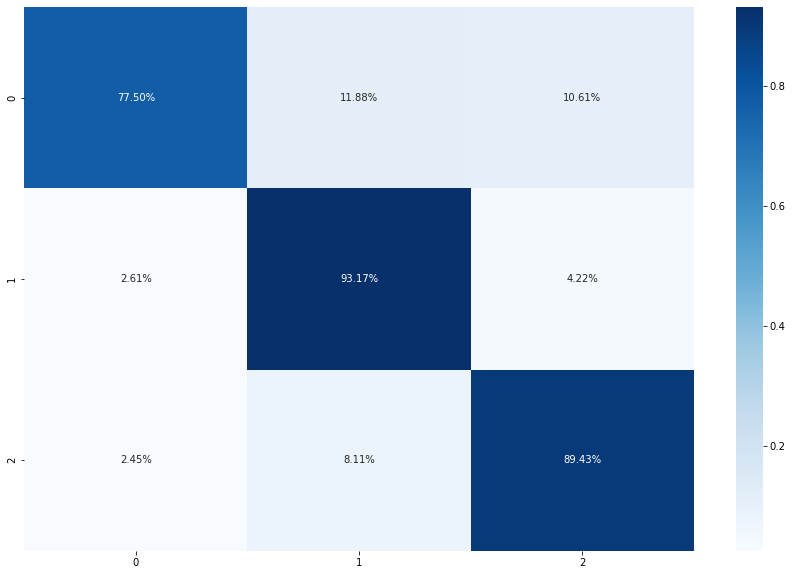

In [6]:
plt.figure(figsize=[15,10])
sns.heatmap(cnf_matrix_norm, annot=True, fmt='.2%', cmap='Blues')
plt.show()